In [11]:
import week1
import week3
import numpy as np
import matplotlib.pyplot as plt


In [12]:
def action_to_name(a):
    if a == 0:
        return "rock"
    if a == 1:
        return "paper"
    return "scissors"

In [13]:
def average_strat(strat, n):
    counts = np.zeros(n)
    for i in range(n):
        counts[i] = strat.count(i)
    avg_strat = counts / sum(counts)
    return avg_strat.reshape((n,1))

def best_response_from_avg(matrix, actions, n):#counts, n):
    # 2 1 1 0
    # a = actions[-1]
    # counts[a] += 1
    # strat = counts / sum(counts)
    if len(actions) == 0:
        a = np.random.randint(0,n)
        strat = np.zeros(n)
        strat[a] = 1
        return strat.reshape((n,1)).T
    
    strat = average_strat(actions, n)
    br = week1.best_response(matrix, strat, for_row=False)
    # print(f"{actions} -> {strat} -> {br}")
    return br


def best_response_last(matrix, actions, n):
    a = actions[-1] if len(actions) > 0 else np.random.randint(0,n)
    strat = np.zeros(n)
    strat[a] = 1
    br = week1.best_response(matrix, strat, for_row=False)
    # print(f"last was: {action_to_name(a)} -> br: {br} ({action_to_name(np.argmax(br))})")
    return br

In [14]:

def game(matrix1, matrix2, turns, function1, function2):
    n, m = matrix1.shape

    actions1 = []
    actions2 = []

    utility1 = []
    utility2 = []

    expl = []
    for i in range(turns):
        # print(f"turn {i+1}/{turns}")
        strat1 = function1(matrix1, actions2, m)
        strat2 = function2(matrix2, actions1, n)
        # print(strat1)
        # print(strat2)
        # response1 = np.choices(strat1)
        # response2 = np.argmax(strat2)
        
        response1 = np.random.choice(n, p=strat1[0])
        response2 = np.random.choice(m, p=strat2[0])
        
        actions1.append(response1)
        actions2.append(response2)

        u1 = matrix1[response1, response2]
        u2 = matrix2[response2, response1]

        utility1.append(u1)
        # print(action_to_name(response1), " vs ", action_to_name(response2))
        utility2.append(u2)
        # print(u1, u2)

        # print(average_strat(actions1, n).T.shape, average_strat(actions2, m).shape)
        # print(strat1.shape, strat2.T.shape)
        
        exploitation = week3.compute_exploitability_zero_sum(matrix1, average_strat(actions1, n).T, average_strat(actions2, m))
        
        expl.append(exploitation)

    # print(f"u1: {utility1}",f"sum {sum(utility1)}",sep='\n')
    # print(f"u2: {utility2}", f"sum {sum(utility2)}", sep='\n')
    # print(expl)
    # plt.plot(expl)
    # plt.show()
    return utility1, utility2, expl






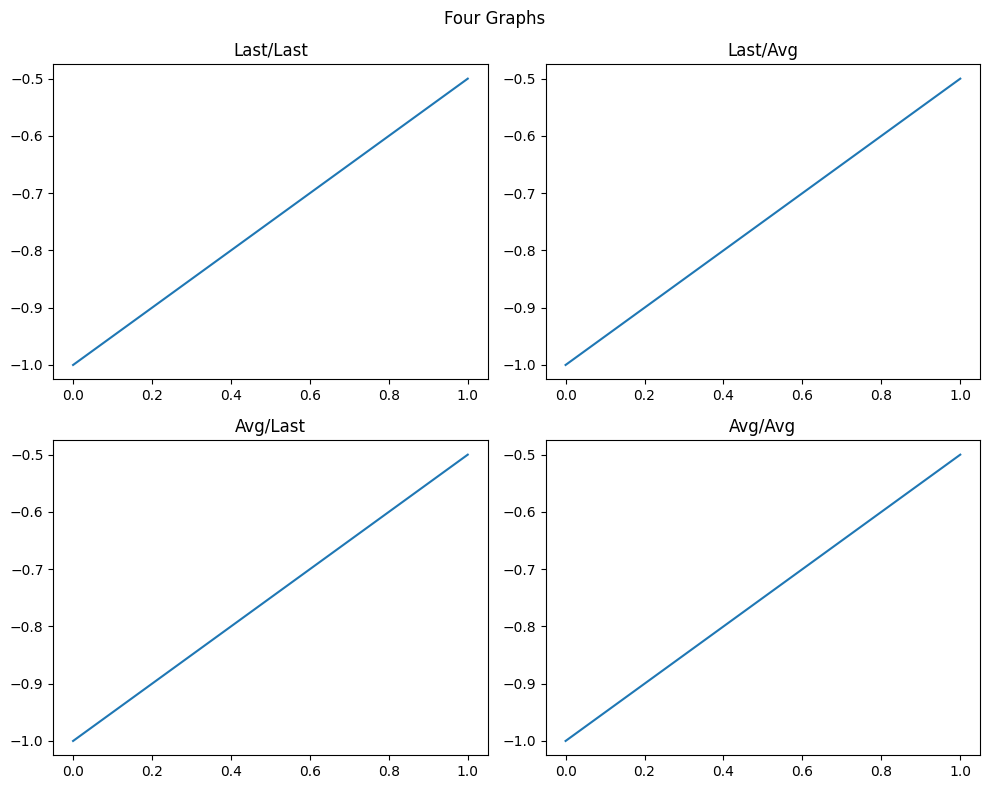

In [15]:
# rock-paper-scissors
# matrix1 = np.array([[0, 1, -1],
#                     [-1, 0, 1],
#                     [1, -1, 0]])
# matrix2 = -matrix1.T

# matching pennies
matrix1 = np.array([[1, -1],
                    [-1, 1]]).T
matrix2 = -matrix1.T

turns = 2
_,_, exlp_ll = game(matrix1, matrix2, turns, best_response_last, best_response_last)
_,_, exlp_la = game(matrix1, matrix2, turns, best_response_last, best_response_from_avg)
_,_, exlp_al = game(matrix1, matrix2, turns, best_response_from_avg, best_response_last)
_,_, exlp_aa = game(matrix1, matrix2, turns, best_response_from_avg, best_response_from_avg)


# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Plot on each subplot
axes[0, 0].plot(exlp_ll)
axes[0, 0].set_title('Last/Last')

axes[0, 1].plot(exlp_la)
axes[0, 1].set_title('Last/Avg')

axes[1, 0].plot(exlp_al)
axes[1, 0].set_title('Avg/Last')

axes[1, 1].plot(exlp_ll)
axes[1, 1].set_title('Avg/Avg')

# Add a title for the entire figure
fig.suptitle('Four Graphs')

# Adjust the layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()